In [1]:
#한글 폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,177 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from sklearn.preprocessing import MinMaxScaler

plt.rc('font', family='NanumBarunGothic')

In [2]:
df = pd.read_csv("합천_댐기상종합_forTrain.csv", index_col="Unnamed: 0")
df.index = pd.to_datetime(df.index)
df.head()

,저수량(현재),전일방류량(본댐),당일유입량,홍수기,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,기온(°C),강수량(mm),지면온도(°C),습도(%),1일후강수량,2일후강수량
2000-01-01,513.350000,28.9,4.4,0.0,-0.974928,-0.222521,0.0,1.0,6.432491e-16,1.000000,4.000000,0.0000,3.864583,63.333333,0.000000,0.000000
2000-01-02,512.137500,23.7,4.7,0.0,-0.781831,0.623490,0.0,1.0,6.432491e-16,1.000000,7.133333,0.0000,5.345833,65.208333,0.000000,0.000000
2000-01-03,509.795833,26.1,3.8,0.0,0.000000,1.000000,0.0,1.0,1.205367e-01,0.992709,2.062500,0.0000,2.275000,55.916667,0.000000,0.187500
2000-01-04,508.370833,27.3,6.1,0.0,0.781831,0.623490,0.0,1.0,1.205367e-01,0.992709,0.829167,0.0000,1.862500,56.916667,0.187500,1.020833
2000-01-05,506.537500,25.2,8.0,0.0,0.974928,-0.222521,0.0,1.0,1.205367e-01,0.992709,3.900000,0.1875,3.862500,62.791667,1.020833,0.135417


In [3]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [4]:
df_scaled = pd.DataFrame(data=scaled_data, columns=df.columns, index=df.index.values)
df_scaled.head()

,저수량(현재),전일방류량(본댐),당일유입량,홍수기,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,기온(°C),강수량(mm),지면온도(°C),습도(%),1일후강수량,2일후강수량
2000-01-01,0.582062,0.017042,0.002319,0.0,0.000000,0.356896,0.5,1.0,0.500000,1.000000,0.347890,0.000000,0.209110,0.553127,0.000000,0.000000
2000-01-02,0.580077,0.013976,0.002477,0.0,0.099031,0.801938,0.5,1.0,0.500000,1.000000,0.421855,0.000000,0.239237,0.576004,0.000000,0.000000
2000-01-03,0.576244,0.015391,0.002003,0.0,0.500000,1.000000,0.5,1.0,0.560268,0.996354,0.302154,0.000000,0.176780,0.462633,0.000000,0.005805
2000-01-04,0.573911,0.016099,0.003215,0.0,0.900969,0.801938,0.5,1.0,0.560268,0.996354,0.273040,0.000000,0.168390,0.474835,0.005805,0.031605
2000-01-05,0.570909,0.014860,0.004217,0.0,1.000000,0.356896,0.5,1.0,0.560268,0.996354,0.345530,0.005805,0.209068,0.546518,0.031605,0.004193


In [5]:
y = df_scaled[['당일유입량']]
y

,당일유입량
2000-01-01,0.002319
2000-01-02,0.002477
2000-01-03,0.002003
2000-01-04,0.003215
2000-01-05,0.004217
...,...
2023-03-31,0.001423
2023-04-01,0.001212
2023-04-02,0.001370
2023-04-03,0.001634


In [6]:
X = df_scaled.drop('당일유입량', axis=1)
X

,저수량(현재),전일방류량(본댐),홍수기,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,기온(°C),강수량(mm),지면온도(°C),습도(%),1일후강수량,2일후강수량
2000-01-01,0.582062,0.017042,0.0,0.000000,0.356896,0.500000,1.00,0.500000,1.000000,0.347890,0.000000,0.209110,0.553127,0.000000,0.000000
2000-01-02,0.580077,0.013976,0.0,0.099031,0.801938,0.500000,1.00,0.500000,1.000000,0.421855,0.000000,0.239237,0.576004,0.000000,0.000000
2000-01-03,0.576244,0.015391,0.0,0.500000,1.000000,0.500000,1.00,0.560268,0.996354,0.302154,0.000000,0.176780,0.462633,0.000000,0.005805
2000-01-04,0.573911,0.016099,0.0,0.900969,0.801938,0.500000,1.00,0.560268,0.996354,0.273040,0.000000,0.168390,0.474835,0.005805,0.031605
2000-01-05,0.570909,0.014860,0.0,1.000000,0.356896,0.500000,1.00,0.560268,0.996354,0.345530,0.005805,0.209068,0.546518,0.031605,0.004193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.089927,0.005130,0.0,0.277479,0.000000,0.933013,0.75,1.000000,0.500000,0.613652,0.004896,0.506102,0.309609,0.005905,0.006914
2023-04-01,0.089750,0.000767,0.0,0.000000,0.356896,1.000000,0.50,1.000000,0.500000,0.590636,0.005905,0.497288,0.388917,0.006914,0.007922
2023-04-02,0.089429,0.002948,0.0,0.099031,0.801938,1.000000,0.50,1.000000,0.500000,0.582374,0.006914,0.494068,0.384342,0.007922,0.010210
2023-04-03,0.089061,0.002948,0.0,0.500000,1.000000,1.000000,0.50,0.996354,0.439732,0.575293,0.007922,0.500000,0.417895,0.010210,0.027090


In [7]:
df = pd.merge(y, X,left_index=True, right_index=True,how='inner')
df

,당일유입량,저수량(현재),전일방류량(본댐),홍수기,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,기온(°C),강수량(mm),지면온도(°C),습도(%),1일후강수량,2일후강수량
2000-01-01,0.002319,0.582062,0.017042,0.0,0.000000,0.356896,0.500000,1.00,0.500000,1.000000,0.347890,0.000000,0.209110,0.553127,0.000000,0.000000
2000-01-02,0.002477,0.580077,0.013976,0.0,0.099031,0.801938,0.500000,1.00,0.500000,1.000000,0.421855,0.000000,0.239237,0.576004,0.000000,0.000000
2000-01-03,0.002003,0.576244,0.015391,0.0,0.500000,1.000000,0.500000,1.00,0.560268,0.996354,0.302154,0.000000,0.176780,0.462633,0.000000,0.005805
2000-01-04,0.003215,0.573911,0.016099,0.0,0.900969,0.801938,0.500000,1.00,0.560268,0.996354,0.273040,0.000000,0.168390,0.474835,0.005805,0.031605
2000-01-05,0.004217,0.570909,0.014860,0.0,1.000000,0.356896,0.500000,1.00,0.560268,0.996354,0.345530,0.005805,0.209068,0.546518,0.031605,0.004193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,0.001423,0.089927,0.005130,0.0,0.277479,0.000000,0.933013,0.75,1.000000,0.500000,0.613652,0.004896,0.506102,0.309609,0.005905,0.006914
2023-04-01,0.001212,0.089750,0.000767,0.0,0.000000,0.356896,1.000000,0.50,1.000000,0.500000,0.590636,0.005905,0.497288,0.388917,0.006914,0.007922
2023-04-02,0.001370,0.089429,0.002948,0.0,0.099031,0.801938,1.000000,0.50,1.000000,0.500000,0.582374,0.006914,0.494068,0.384342,0.007922,0.010210
2023-04-03,0.001634,0.089061,0.002948,0.0,0.500000,1.000000,1.000000,0.50,0.996354,0.439732,0.575293,0.007922,0.500000,0.417895,0.010210,0.027090


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


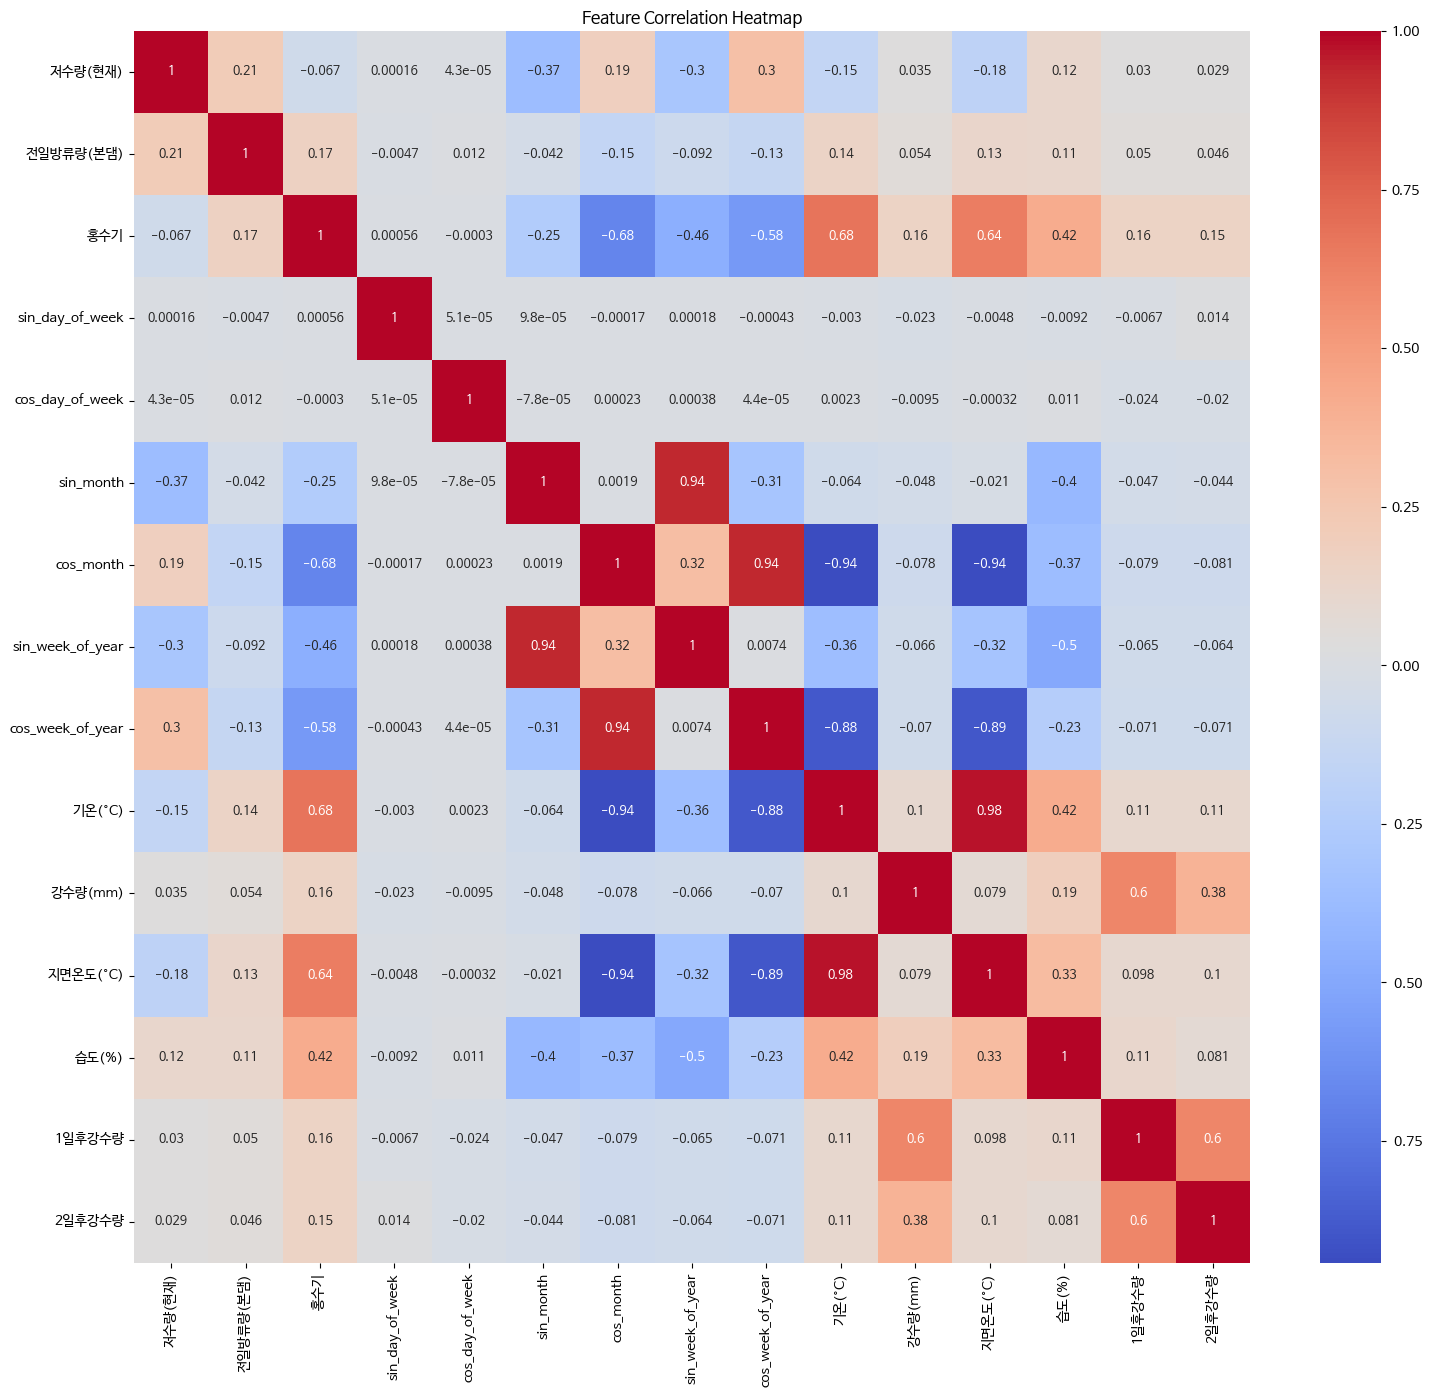

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# X 데이터셋의 feature 상관계수 계산
corr_matrix = X.corr()

# Heatmap 시각화
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 9})
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
import statsmodels.api as sm
vif = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]

result = sm.OLS(y,X).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  당일유입량   R-squared (uncentered):                   0.268
Model:                            OLS   Adj. R-squared (uncentered):              0.267
Method:                 Least Squares   F-statistic:                              207.3
Date:                Sun, 28 May 2023   Prob (F-statistic):                        0.00
Time:                        07:43:57   Log-Likelihood:                          17467.
No. Observations:                8495   AIC:                                 -3.490e+04
Df Residuals:                    8480   BIC:                                 -3.480e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [10]:
# 모델 학습
model = sm.OLS(y, X)
result = model.fit()

# 다중공선성 확인
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif #VIF: Variance Inflation Factor. 분산팽창지수

,Features,VIF
0,저수량(현재),5.544888
1,전일방류량(본댐),1.529365
2,홍수기,3.031637
3,sin_day_of_week,2.875835
4,cos_day_of_week,2.614982
5,sin_month,113.291456
6,cos_month,120.989291
7,sin_week_of_year,126.041087
8,cos_week_of_year,101.106273
9,기온(°C),207.637784
